In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.stats import norm, chisquare, chi2

# Задание 1

In [2]:
intervals = np.array([44, 46, 48, 50, 52, 54, 56])
n = np.array([4, 13, 34, 32, 12, 5])
values = np.zeros(len(intervals)-1)
freq = np.zeros(len(intervals)-1)
for i in range(len(intervals)-1):
    values[i] = (intervals[i] + intervals[i+1]) / 2
    freq[i] = n[i] / np.sum(n)
print(values)
print(n)
print(freq)    

[45. 47. 49. 51. 53. 55.]
[ 4 13 34 32 12  5]
[0.04 0.13 0.34 0.32 0.12 0.05]


In [3]:
rv = []
for i in range(len(n)):
    rv.extend([values.tolist()[i]]*n.tolist()[i])
rv = np.sort(np.array(rv))
print('Вариационный ряд: ')
print(rv)

Вариационный ряд: 
[45. 45. 45. 45. 47. 47. 47. 47. 47. 47. 47. 47. 47. 47. 47. 47. 47. 49.
 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49.
 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 49. 51. 51. 51.
 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51.
 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 51. 53. 53. 53. 53. 53. 53. 53.
 53. 53. 53. 53. 53. 55. 55. 55. 55. 55.]


In [4]:
df = pd.DataFrame(index=range(len(np.unique(rv))))
df['Значение'] = pd.Series(np.unique(rv))
df['Частота'] = pd.Series(rv).value_counts().sort_index().to_list()
df['Частость'] = pd.Series(rv).value_counts(normalize=True).sort_index().to_list()
df.T

,0,1,2,3,4,5
Значение,45.00,47.00,49.00,51.00,53.00,55.00
Частота,4.00,13.00,34.00,32.00,12.00,5.00
Частость,0.04,0.13,0.34,0.32,0.12,0.05


$\overline{x}_{в} = \frac{1}{n} \sum_{i=1}^{k} x_{i} \cdot n_{i}$ \
$D_{в} = \frac{1}{n} \sum_{i=1}^{k} (x_{i} - \overline{x}_{в})^2 \cdot n_{i}$ \
$\sigma_{в} = \sqrt{D_{в}}$

In [5]:
rv_series = pd.Series(rv)
mean = rv_series.mean()
variance = np.sum(df['Частота'].values * np.power((df['Значение'].values - mean), 2)) / np.sum(n)
std = np.sqrt(variance)

print(f'Среднее: {mean}')
print(f'Дисперсия: {variance}')
print(f'СКО: {std}')

Среднее: 50.0
Дисперсия: 5.16
СКО: 2.2715633383201093


$\Large{f(x) = \frac{1}{2.271\sqrt{2\pi}}e^{-\frac{(x-50)^{2}}{2\cdot2.271^{2}}}}$

In [6]:
norm_rv = norm(loc=mean, scale=std)

In [7]:
x = np.linspace(45, 55, 100)

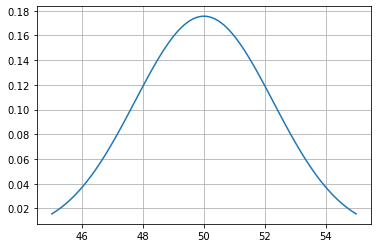

In [8]:
plt.plot(x, norm_rv.pdf(x))
plt.grid()

In [9]:
p = np.zeros(len(intervals)-1)
for i in range(len(intervals)-1):
    p[i] = norm_rv.cdf(intervals[i+1]) - norm_rv.cdf(intervals[i])
print(p)

[0.03499873 0.15018003 0.31069246 0.31069246 0.15018003 0.03499873]


In [10]:
theor_freq = p * np.sum(n)
print(theor_freq)

[ 3.49987265 15.01800332 31.06924553 31.06924553 15.01800332  3.49987265]


In [11]:
chi_obs = np.sum(np.power(n - theor_freq, 2) / theor_freq)
crit_chi = chi2.ppf(0.95, len(n)-3)
print(f'Критерий Пирсона по наблюдаемым значениям: {chi_obs}')
print(f'Критическое значение критерия Пирсона для данной задачи: {crit_chi}')
if chi_obs < crit_chi:
    print('Нет оснований отклонять нулевую гиппотезу.')
else:
    print('Отклоняем нулевую гипотезу.')

Критерий Пирсона по наблюдаемым значениям: 1.8964563445779832
Критическое значение критерия Пирсона для данной задачи: 7.814727903251179
Нет оснований отклонять нулевую гиппотезу.


# Задание 2

### Проверка распределения Пуассона

In [12]:
x = np.array([0, 1, 2, 3, 4, 5])
n = np.array([165, 189, 101, 33, 8, 4])

In [13]:
lam = np.sum(x * n) / np.sum(n)
lam

1.084

$\Large{p_{i} = \frac{1.084^{x_{i}} \cdot e^{-1.084}}{x_{i}!}}$

In [28]:
p = np.zeros(len(n))

In [29]:
for i in range(len(p)):
    p[i] = np.power(lam, x[i]) * np.exp(-lam) / np.math.factorial(x[i])
p

array([0.33823986, 0.366652  , 0.19872539, 0.07180611, 0.01945945,
       0.00421881])

In [30]:
theor_freq = p * np.sum(n)
theor_freq

array([169.11992834, 183.32600232,  99.36269326,  35.90305316,
         9.72972741,   2.1094049 ])

In [31]:
chi_obs = np.sum(np.power(n - theor_freq, 2) / theor_freq)
crit_chi_1 = chi2.ppf(0.95, len(n)-2)
crit_chi_2 = chi2.ppf(0.99, len(n)-2)
print(f'Критерий Пирсона по наблюдаемым значениям: {chi_obs}')
print(f'Критическое значение критерия Пирсона для данной задачи при уровне значимости 0.05: {crit_chi_1}')
print(f'Критическое значение критерия Пирсона для данной задачи при уровне значимости 0.01: {crit_chi_2}')

Критерий Пирсона по наблюдаемым значениям: 2.539681939026517
Критическое значение критерия Пирсона для данной задачи при уровне значимости 0.05: 9.487729036781154
Критическое значение критерия Пирсона для данной задачи при уровне значимости 0.01: 13.276704135987622


### Проверка биноминальное распределения

In [16]:
x = np.array([0, 1, 2, 3, 4, 5])
n = np.array([72, 77, 34, 14, 2, 1])
N = 5

In [17]:
p = np.sum(x * n) / np.sum(n) / N
p

0.2

In [18]:
p_array = np.zeros(len(n))
for i in range(len(n)):
    p_array[i] = math.comb(N, i) * np.power(p, i) * np.power(1-p, N-i)
p_array

array([3.2768e-01, 4.0960e-01, 2.0480e-01, 5.1200e-02, 6.4000e-03,
       3.2000e-04])

In [19]:
theor_freq = p_array * np.sum(n)
theor_freq

array([6.5536e+01, 8.1920e+01, 4.0960e+01, 1.0240e+01, 1.2800e+00,
       6.4000e-02])

In [20]:
n_copy = n.copy()
theor_freq_copy = theor_freq.copy()
for i in range(len(n)-1):
    if n_copy[i] < 5:
        n_copy[i+1] += n_copy[i]
        theor_freq_copy[i+1] += theor_freq_copy[i]
        theor_freq_copy[i] = 0
        n_copy[i] = 0

for i in range(len(n)-1, -1, -1):
    if n_copy[i] < 5:
        n_copy[i-1] += n_copy[i]
        theor_freq_copy[i-1] += theor_freq_copy[i]
        theor_freq_copy[i] = 0
        n_copy[i] = 0
        
n_copy = n_copy[n_copy > 0]
theor_freq_copy = theor_freq_copy[theor_freq_copy > 0]
print(n_copy)
print(theor_freq_copy)

[72 77 34 17]
[65.536 81.92  40.96  11.584]


In [21]:
chi_obs = np.sum(np.power(n_copy - theor_freq_copy, 2) / theor_freq_copy)
crit_chi = chi2.ppf(0.95, len(n_copy)-2)
print(f'Критерий Пирсона по наблюдаемым значениям: {chi_obs}')
print(f'Критическое значение критерия Пирсона для данной задачи: {crit_chi}')
if chi_obs < crit_chi:
    print('Нет оснований отклонять нулевую гиппотезу.')
else:
    print('Отклоняем нулевую гипотезу.')

Критерий Пирсона по наблюдаемым значениям: 4.647911451139501
Критическое значение критерия Пирсона для данной задачи: 5.991464547107979
Нет оснований отклонять нулевую гиппотезу.


In [22]:
len(n_copy)-2

2

## Проверка равномерного распределения

In [4]:
intervals = np.array([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
n = np.array([12, 40, 22, 16, 28, 6, 11, 33, 18, 14])
values = np.zeros(len(intervals)-1)
freq = np.zeros(len(intervals)-1)
for i in range(len(intervals)-1):
    values[i] = (intervals[i] + intervals[i+1]) / 2
    freq[i] = n[i] / np.sum(n) 

In [5]:
rv = []
for i in range(len(n)):
    rv.extend([values.tolist()[i]]*n.tolist()[i])
rv = np.sort(np.array(rv))

In [6]:
df = pd.DataFrame(index=range(len(np.unique(rv))))
df['Значение'] = pd.Series(np.unique(rv))
df['Частота'] = pd.Series(rv).value_counts().sort_index().to_list()
df['Частость'] = pd.Series(rv).value_counts(normalize=True).sort_index().to_list()
df.T

,0,1,2,3,4,5,6,7,8,9
Значение,8.50,9.5,10.50,11.50,12.50,13.50,14.500,15.500,16.50,17.50
Частота,12.00,40.0,22.00,16.00,28.00,6.00,11.000,33.000,18.00,14.00
Частость,0.06,0.2,0.11,0.08,0.14,0.03,0.055,0.165,0.09,0.07


In [7]:
mean = np.sum(values * n) / np.sum(n)
variance = np.sum(n * np.power(values - mean, 2)) / np.sum(n)

a = mean - np.sqrt(3 * variance)
b = mean + np.sqrt(3 * variance)
a, b

(7.756371402095324, 17.653628597904678)

In [12]:
mean

12.705

In [13]:
np.sqrt(variance)

2.857092053119745

In [14]:
1 / (b-a)

0.10103809370776126

In [8]:
theor_freq = np.zeros(len(n))

for i in range(len(theor_freq)):
    if i == 0:
        theor_freq[i] = 1 / (b - a) * (intervals[i+1] - a)
    elif i == len(n) - 1:
        theor_freq[i] = 1 / (b - a) * (b - intervals[i])
    else:
        theor_freq[i] = 1 / (b - a) * (intervals[i+1] - intervals[i])
        
theor_freq *= np.sum(n)

In [9]:
df['Теоретическая частота'] = theor_freq

In [10]:
df.T

,0,1,2,3,4,5,6,7,8,9
Значение,8.500000,9.500000,10.500000,11.500000,12.500000,13.500000,14.500000,15.500000,16.500000,17.500000
Частота,12.000000,40.000000,22.000000,16.000000,28.000000,6.000000,11.000000,33.000000,18.000000,14.000000
Частость,0.060000,0.200000,0.110000,0.080000,0.140000,0.030000,0.055000,0.165000,0.090000,0.070000
Теоретическая частота,25.130773,20.207619,20.207619,20.207619,20.207619,20.207619,20.207619,20.207619,20.207619,13.208278


In [11]:
chi_obs = np.sum(np.power(n - theor_freq, 2) / theor_freq)
crit_chi_1 = chi2.ppf(0.95, len(n)-3)
crit_chi_2 = chi2.ppf(0.99, len(n)-3)
print(f'Критерий Пирсона по наблюдаемым значениям: {chi_obs}')
print(f'Критическое значение критерия Пирсона для данной задачи при уровне значимости 0.05: {crit_chi_1}')
print(f'Критическое значение критерия Пирсона для данной задачи при уровне значимости 0.01: {crit_chi_2}')

Критерий Пирсона по наблюдаемым значениям: 52.85783261490025
Критическое значение критерия Пирсона для данной задачи при уровне значимости 0.05: 14.067140449340169
Критическое значение критерия Пирсона для данной задачи при уровне значимости 0.01: 18.475306906582357


In [15]:
len(n)-3

7